# King Count Houses - Insights  Project

# Basic setups

## IMPORTS

In [1]:
import math
import plotly.express as px
import pandas as pd
from IPython.core.display     import HTML
import seaborn       as sns
import datetime
import ipywidgets as widgets
from   ipywidgets import fixed
import matplotlib.pyplot as plt

## Helper functions

In [2]:
#jupyter notebook settings
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Supress Scientific Notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

# Data Description

## Data Load

In [4]:
df_raw = pd.read_csv(r'../data/raw/kc_house_data.csv') 

## Data Overview

In [5]:
df_raw.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3668,293700110,20140926T000000,775000.00,4,2.50,3890,34513,2.00,0,0,3,10,3890,0,1996,0,98077,47.77,-122.05,3600,28435
696,7527200030,20141229T000000,700000.00,5,2.50,2830,25958,1.00,0,1,5,8,1610,1220,1979,0,98075,47.59,-122.08,2670,21567
11757,9133600135,20150211T000000,160000.00,4,2.25,1800,14722,1.00,0,0,3,7,1440,360,1962,0,98055,47.49,-122.22,2400,10000
9647,5634500234,20150513T000000,554990.00,3,2.50,2100,6092,2.00,0,0,3,8,2100,0,2013,0,98028,47.75,-122.24,2250,8592
15820,1193000480,20140724T000000,784000.00,4,2.75,3540,7091,1.50,0,1,4,8,1970,1570,1947,0,98199,47.65,-122.39,2200,6000


In [6]:
print ('The original dataset have {} transation registers with {} attributes.'.format(df_raw.shape[0], df_raw.shape[1]))

The original dataset have 21613 transation registers with 21 attributes.


In [7]:
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

1° Task: Check the attributes: 'grade','sqft_living15', 'sqft_lot15' and 'view'
Identify, cleaning or drop.

## Data Types

In [8]:
df_raw.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Tasks:

2°)Change 'waterfront' from 0 or 1 to yes or no

3°)Change 'date' to date format

## Check NA

In [9]:
df_raw.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Check Duplicated

In [10]:
df_raw['id'].duplicated().sum()

177

Task:

4) Identify the duplicated ones and drop if it is necessary.

## Check attributes

### Attribute 'grade'

It's an index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

In [11]:
df_raw['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

### Attribute 'sqft_living15'

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

In [12]:
df_raw['sqft_living15'].unique()

array([1340, 1690, 2720, 1360, 1800, 4760, 2238, 1650, 1780, 2390, 2210,
       1330, 1370, 2140, 1890, 1610, 1060, 1280, 1400, 4110, 2240, 1220,
       2200, 1030, 1760, 1860, 1520, 2630, 2580, 1390, 1460, 1570, 2020,
       1590, 2160, 1730, 1290, 2620, 2470, 2410, 3625, 1580, 3050, 1228,
       2680,  970, 1190, 1990, 1410, 1480, 2730, 1950, 2250, 2690, 2960,
       2270, 2570, 2500, 1440, 2750, 2221, 1010, 3390, 3530, 1640, 1510,
       2420, 1940, 3240, 1680,  890, 1130, 3350, 2350, 1870, 1720, 1850,
       1900, 1980, 2520, 1350, 1750, 1160, 2550, 2370, 1240, 1270, 2990,
       1380, 1540, 2090, 2640, 1830, 1620, 1880, 2340, 1710, 2700, 3060,
       2660, 1700, 1970, 1420, 2060, 2480, 1550, 1170, 2820, 1560, 2230,
       2840, 1450, 1500, 3160, 1200, 3400, 2110, 2920, 1770, 1070, 1930,
       3740, 2260, 1670, 2290, 1050, 2540, 2190, 2030, 1230, 2330, 1300,
       1430, 2770, 1250, 1630, 2590, 2130, 1100, 3836, 1320, 2120, 3070,
       1910, 2080, 1960, 2280, 1150, 3430, 2070, 26

Task 5) - Drop this feature

### Attibute 'sqft_lot15'

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [13]:
df_raw['sqft_lot15'].unique()

array([5650, 7639, 8062, ..., 5731, 1509, 2007], dtype=int64)

Task 6): Drop this feature

### Attribute 'view'

view - An index from 0 to 4 of how good the view of the property was

In [14]:
df_raw['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

***Decision*** 

Keep it.

## Statistics Data Overview

In [15]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


Tasks:

7) There is a big std in the price, and seems to have outliers. Check it.

8) There is at least one house without bedrooms and one with 33. Check it.

9) There is at least one house without bathrooms. Check it.

10) There are houses with the year of renovation with '0'. It has to be treated.

# Data Transform/Preparing

In [16]:
df3 = df_raw.copy()

1) Drop 'sqft_living15'

2) Drop 'sqft_lot15' 

In [17]:
df3 = df3.drop(columns = ['sqft_living15', 'sqft_lot15'], axis = 1)
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05


3) Change 'waterfront' from 0 or 1 to yes or no

In [18]:
df3['waterfront'] = df3['waterfront'].apply(lambda x: 'yes' if x==1 else 'no')

4) Change 'date' to date format

In [19]:
df3['date'] = pd.to_datetime(df3['date'])

5) Identify the duplicated ones and drop if it is necessary

In [20]:
df_dup = df3[df3['id'].duplicated(keep = False )].reset_index(drop=True)
df_dup.shape[0]

353

In [21]:
print ('There is {} duplicated registers in the dataframe. Duplicated registers with the same date will be dropped'.format(df_dup.shape[0]))

There is 353 duplicated registers in the dataframe. Duplicated registers with the same date will be dropped


In [22]:
df_dup.drop_duplicates(subset = ['id', 'date']).reset_index()
df_dup.head(50)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,6021501535,2014-07-25,430000.00,3,1.50,1580,5000,1.00,no,0,3,8,1290,290,1939,0,98117,47.69,-122.39
1,6021501535,2014-12-23,700000.00,3,1.50,1580,5000,1.00,no,0,3,8,1290,290,1939,0,98117,47.69,-122.39
2,4139480200,2014-06-18,1384000.00,4,3.25,4290,12103,1.00,no,3,3,11,2690,1600,1997,0,98006,47.55,-122.10
3,4139480200,2014-12-09,1400000.00,4,3.25,4290,12103,1.00,no,3,3,11,2690,1600,1997,0,98006,47.55,-122.10
4,7520000520,2014-09-05,232000.00,2,1.00,1240,12092,1.00,no,0,3,6,960,280,1922,1984,98146,47.50,-122.35
5,7520000520,2015-03-11,240500.00,2,1.00,1240,12092,1.00,no,0,3,6,960,280,1922,1984,98146,47.50,-122.35
6,3969300030,2014-07-23,165000.00,4,1.00,1000,7134,1.00,no,0,3,6,1000,0,1943,0,98178,47.49,-122.24
7,3969300030,2014-12-29,239900.00,4,1.00,1000,7134,1.00,no,0,3,6,1000,0,1943,0,98178,47.49,-122.24
8,2231500030,2014-10-01,315000.00,4,2.25,2180,10754,1.00,no,0,5,7,1100,1080,1954,0,98133,47.77,-122.34
9,2231500030,2015-03-24,530000.00,4,2.25,2180,10754,1.00,no,0,5,7,1100,1080,1954,0,98133,47.77,-122.34


In [23]:
df_dup.shape[0]

353

There are not duplicated rows with the same id and date. 

7) There is a big std in the price, and seems to have outliers. Check it.

In [24]:
df3[df3['price'] == 7700000] # most expensive house on dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
7252,6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,no,3,4,13,8570,3480,1910,1987,98102,47.63,-122.32


It seems a big classic house. The lot size fit with the size of the house. It will be keeped. 

8) Registers with 0 and 33 bedrooms

In [25]:
zero_bed_df = df3[df3['bedrooms'] == 0] [['id','bathrooms','bedrooms','sqft_living', 'sqft_lot']]

In [26]:
print('There are {} registers without bedrooms. It will be droped.'.format(zero_bed_df.shape[0]))

There are 13 registers without bedrooms. It will be droped.


In [27]:
zero_bed = df3[df3['bedrooms'] == 0] ['id'].reset_index(drop=True).to_list()
df3 = df3[~df3['id'].isin(zero_bed)]

In [28]:
df3[df3['bedrooms']==33] # house with 33 bedrooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
15870,2402100895,2014-06-25,640000.00,33,1.75,1620,6000,1.00,no,0,5,7,1040,580,1947,0,98103,47.69,-122.33


The lot size and number of floor do not fit with a 33 bedrooms house. It will be droped.

In [29]:
df3 = df3.drop(index = 15870) # index of the 33-bedrooms house

9) Registers without bathrooms

In [30]:
zero_bath = df3[df3['bathrooms'] == 0] ['id'].reset_index(drop=True).to_list()

In [31]:
print ('There are {} registers without bathrooms. It will be droped.'.format(len(zero_bath)))

There are 3 registers without bathrooms. It will be droped.


In [32]:
df3 = df3[~df3['id'].isin(zero_bath)]

10) There are houses with the year of renovation with '0'. 

Decision: Keep this.

# Feature Engeneering

In [33]:
df4 = df3.copy()

## Business Hipotesys

1) Houses with waterview are more expensive.

2) Houses that were not renovated are cheaper.

3) There is a season in the year that more houses are sell

4) There is a main numerical feature that raise the prices

5) There is a main categorical feature that raise the prices.


## Area

In [34]:
# selecting the major area for each house
df4['area'] = df4[['sqft_living', 'sqft_lot']].apply(lambda x: x['sqft_living'] if x['sqft_living'] >= x['sqft_lot'] else x['sqft_lot'], axis = 1)

In [35]:
df4.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
area             0
dtype: int64

## Average price per area

In [36]:
df4['price_area'] = df4['price'] / df4['area'] # price/sqft for each house

In [37]:
df4.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
area             0
price_area       0
dtype: int64

## Average price per area per zipcode

In [38]:
zipcode_price_df = df4[['price_area', 'zipcode']].groupby('zipcode').mean().reset_index()
zipcode_price_df.rename(columns ={'price_area':'zipcode_price'},inplace=True)
zipcode_price_df.head()

,zipcode,zipcode_price
0,98001,30.87
1,98002,37.27
2,98003,32.95
3,98004,119.13
4,98005,60.92


In [39]:
df4 = pd.merge(df4,zipcode_price_df, how='left', on='zipcode')

In [40]:
df4.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
area             0
price_area       0
zipcode_price    0
dtype: int64

## Trimester

In [41]:
print('Dataset goes since {} to {}.'.format(df4['date'].min(),df4['date'].max()) )

Dataset goes since 2014-05-02 00:00:00 to 2015-05-27 00:00:00.


In [42]:
def trimester_of_year(date):
    year = str(date.year)
    trimesters={ 'First': pd.date_range( start='01/01/'+year, end ='31/03/' +year),
            'Second': pd.date_range( start='01/04/'+year, end ='30/06/' +year),
             'Third': pd.date_range( start='01/07/'+year, end ='30/09/' +year),
            'Fourth': pd.date_range( start='01/10/'+year, end ='31/12/' +year)}
    if date in trimesters['First']:
        return 'First'
    if date in trimesters['Second']:
        return 'Second'
    if date in trimesters['Third' ]:
        return 'Third'
    else:
        return 'Fourth'


In [43]:
df4['trimester'] = df4['date'].map(trimester_of_year)

In [44]:
df4.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
area             0
price_area       0
zipcode_price    0
trimester        0
dtype: int64

In [45]:
df4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,area,price_area,zipcode_price,trimester
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,no,0,3,7,1180,0,1955,0,98178,47.51,-122.26,5650,39.27,42.61,Fourth
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,no,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,7242,74.29,78.56,Fourth
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,no,0,3,6,770,0,1933,0,98028,47.74,-122.23,10000,18.00,55.71,First
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,no,0,5,7,1050,910,1965,0,98136,47.52,-122.39,5000,120.80,126.71,Fourth
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,no,0,3,8,1680,0,1987,0,98074,47.62,-122.05,8080,63.12,71.44,First


# Exploratory Data Analisys (EDA)

In [46]:
df5 = df4.copy()

## Feature filtering

In [47]:
df5 = df5.drop(columns = ['price', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement'], axis=1)
df5.head()

,id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,area,price_area,zipcode_price,trimester
0,7129300520,2014-10-13,3,1.00,1.00,no,0,3,7,1955,0,98178,47.51,-122.26,5650,39.27,42.61,Fourth
1,6414100192,2014-12-09,3,2.25,2.00,no,0,3,7,1951,1991,98125,47.72,-122.32,7242,74.29,78.56,Fourth
2,5631500400,2015-02-25,2,1.00,1.00,no,0,3,6,1933,0,98028,47.74,-122.23,10000,18.00,55.71,First
3,2487200875,2014-12-09,4,3.00,1.00,no,0,5,7,1965,0,98136,47.52,-122.39,5000,120.80,126.71,Fourth
4,1954400510,2015-02-18,3,2.00,1.00,no,0,3,8,1987,0,98074,47.62,-122.05,8080,63.12,71.44,First


In [48]:
# attributes filtering
num_attributes = df5[['bedrooms', 'bathrooms', 'floors','area','price_area','zipcode_price']]

cat_attributes = df5[['id','price_area','date','trimester', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']]
#price_area in cat_attributes just to use for comparation
       

## Univariate Analisys

### Numerical Attributes

In [49]:
#central tendency statistics - mean, median
ct_mean   = pd.DataFrame ( num_attributes.apply (np.mean   ) ).T
ct_median = pd.DataFrame ( num_attributes.apply (np.median ) ).T

In [50]:
# dispersion statistics - standard deviation, minimum, maximum, range, skew, kurtosis
d_std      = pd.DataFrame ( num_attributes.apply (np.std) ).T
d_min      = pd.DataFrame ( num_attributes.apply (np.min) ).T
d_max      = pd.DataFrame ( num_attributes.apply (np.max) ).T
d_range    = pd.DataFrame ( num_attributes.apply ( lambda x: x.max() - x.min())).T
d_skew     = pd.DataFrame ( num_attributes.apply ( lambda x: x.skew() ) ).T
d_kurtosis = pd.DataFrame ( num_attributes.apply ( lambda x: x.kurtosis() ) ).T

In [51]:
#concatenate
df_metrics = pd.concat ([d_min,d_max,d_range,ct_mean,ct_median,d_std,d_skew,d_kurtosis]).T.reset_index()
df_metrics.columns = ['attributes', 'min.','max','range', 'mean', 'median', 'std', 'skew', 'kurtosis']
df_metrics

,attributes,min.,max,range,mean,median,std,skew,kurtosis
0,bedrooms,1.00,11.00,10.00,3.37,3.00,0.90,0.55,1.80
1,bathrooms,0.50,8.00,7.50,2.12,2.25,0.77,0.52,1.28
2,floors,1.00,3.50,2.50,1.49,1.50,0.54,0.61,-0.49
3,area,772.00,1651359.00,1650587.00,15110.61,7619.00,41409.04,13.07,285.57
4,price_area,0.16,677.63,677.47,85.80,59.26,81.00,2.04,4.84
5,zipcode_price,15.20,293.28,278.08,85.80,71.44,58.62,1.35,1.23


Observations:
    There is a wide range in price/area . The minimum is aproximatelly U$ 0,16 per/squarefoot

In [52]:
min_price = df5['price_area'].min()

In [53]:
df5[df5['price_area'] == min_price]

,id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,area,price_area,zipcode_price,trimester
17304,3326079016,2015-05-04,2,1.00,1.00,no,0,2,5,1915,0,98014,47.69,-121.91,1164794,0.16,17.77,Second


It is a very large house, old and not renovated. Let's take a look into price/area distribution

array([[<AxesSubplot:title={'center':'price_area'}>]], dtype=object)

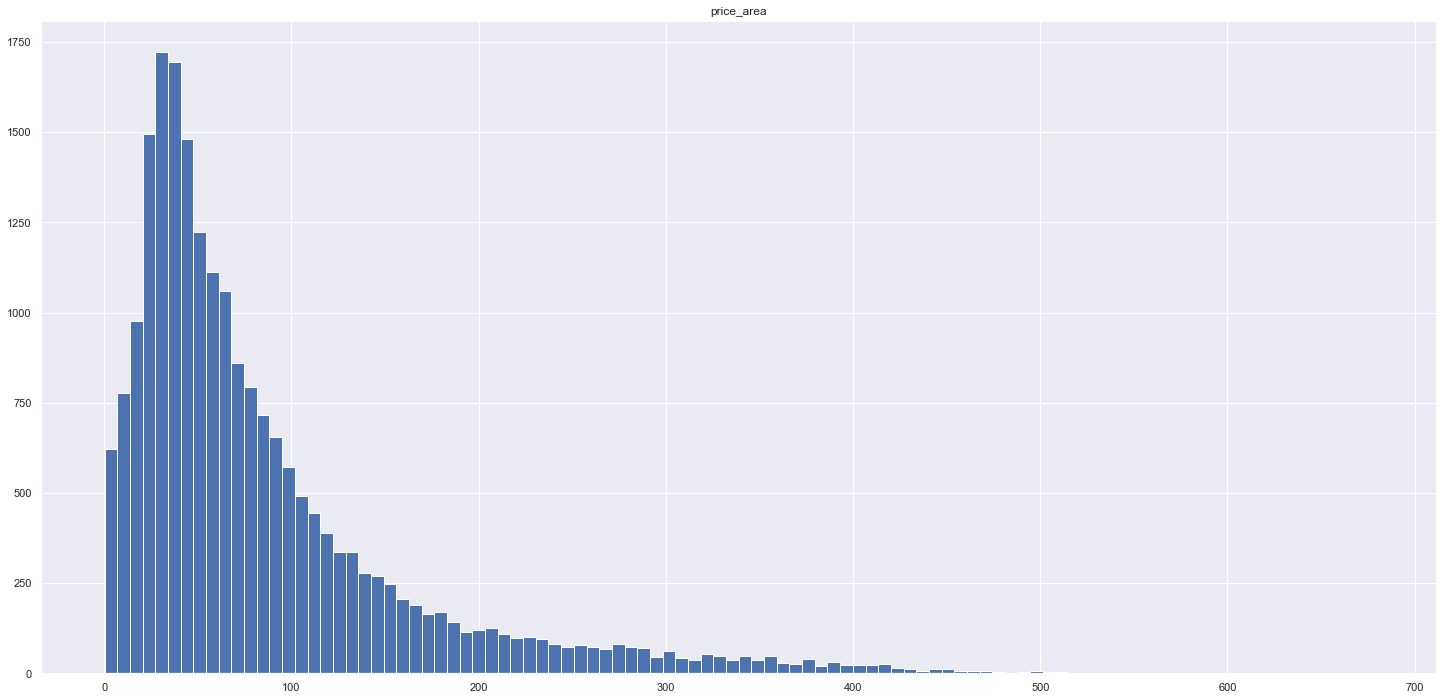

In [54]:
df5.hist(column='price_area', bins=100)

In [55]:
#statistics of the houses below the average price 
below_median = df5[df5['price_area'] < 90]
below_median.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14701.00,4466738553.66,2824444755.12,1000102.00,2045400075.00,3876000120.00,7227501369.00,9900000190.00
bedrooms,14701.00,3.38,0.87,1.00,3.00,3.00,4.00,10.00
bathrooms,14701.00,2.01,0.72,0.50,1.50,2.00,2.50,8.00
floors,14701.00,1.36,0.47,1.00,1.00,1.00,2.00,3.00
view,14701.00,0.18,0.67,0.00,0.00,0.00,0.00,4.00
condition,14701.00,3.43,0.65,1.00,3.00,3.00,4.00,5.00
grade,14701.00,7.48,1.14,3.00,7.00,7.00,8.00,13.00
yr_built,14701.00,1970.97,23.69,1900.00,1955.00,1972.00,1989.00,2015.00
yr_renovated,14701.00,68.32,362.65,0.00,0.00,0.00,0.00,2015.00
zipcode,14701.00,98070.04,55.06,98001.00,98028.00,98055.00,98117.00,98199.00


### Categorical Attributes

In [56]:
cat_attributes.head()

,id,price_area,date,trimester,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,7129300520,39.27,2014-10-13,Fourth,no,0,3,7,1955,0,98178
1,6414100192,74.29,2014-12-09,Fourth,no,0,3,7,1951,1991,98125
2,5631500400,18.00,2015-02-25,First,no,0,3,6,1933,0,98028
3,2487200875,120.80,2014-12-09,Fourth,no,0,5,7,1965,0,98136
4,1954400510,63.12,2015-02-18,First,no,0,3,8,1987,0,98074


In [57]:
total_houses = df5.shape[0]

wf_number    = cat_attributes [ cat_attributes ['waterfront'] == 'yes'].shape[0]

lqd_number   = cat_attributes [ cat_attributes ['grade'] <=3 ].shape[0]

hq_number    = cat_attributes [ cat_attributes ['grade'] >= 11].shape[0]

avgq_number  = total_houses - lqd_number - hq_number

In [58]:
print ( 'Dataset has {} houses with waterview, what corresponding to {:.2f} % of the dataset\n' .format( wf_number, (wf_number/total_houses)*100))
print ( 'Dataset has {} houses with low quality design , what corresponding to {:.2f} % of the dataset\n' .format( lqd_number, (lqd_number/total_houses)*100))
print ( 'Dataset has {} houses with average quality design , what corresponding to {:.2f} % of the dataset\n' .format( avgq_number, (avgq_number/total_houses)*100))
print ( 'Dataset has {} houses with high quality design , what corresponding to {:.2f} % of the dataset' .format( hq_number, (hq_number/total_houses)*100))

Dataset has 163 houses with waterview, what corresponding to 0.75 % of the dataset

Dataset has 1 houses with low quality design , what corresponding to 0.00 % of the dataset

Dataset has 21094 houses with average quality design , what corresponding to 97.68 % of the dataset

Dataset has 501 houses with high quality design , what corresponding to 2.32 % of the dataset


## Bivariate Analysis

### Average price for view

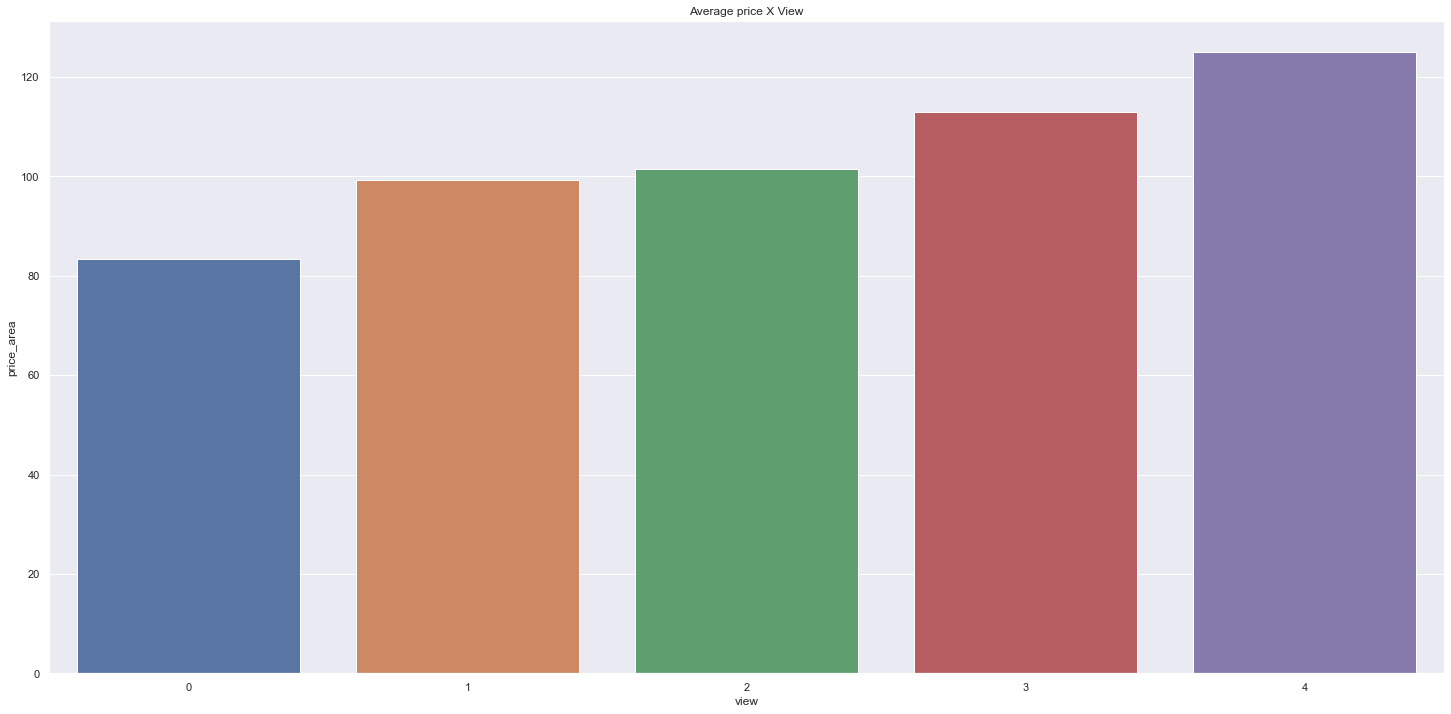

In [59]:
aux5 = cat_attributes[['price_area','view']].groupby('view').mean().reset_index()
sns.barplot(x='view', y ='price_area', data=aux5).set_title('Average price X View')
plt.savefig(r'../reports/figures/avg_price_view.png')

As we can spected, the view has a big contribuition to the price.

### Average price for grade

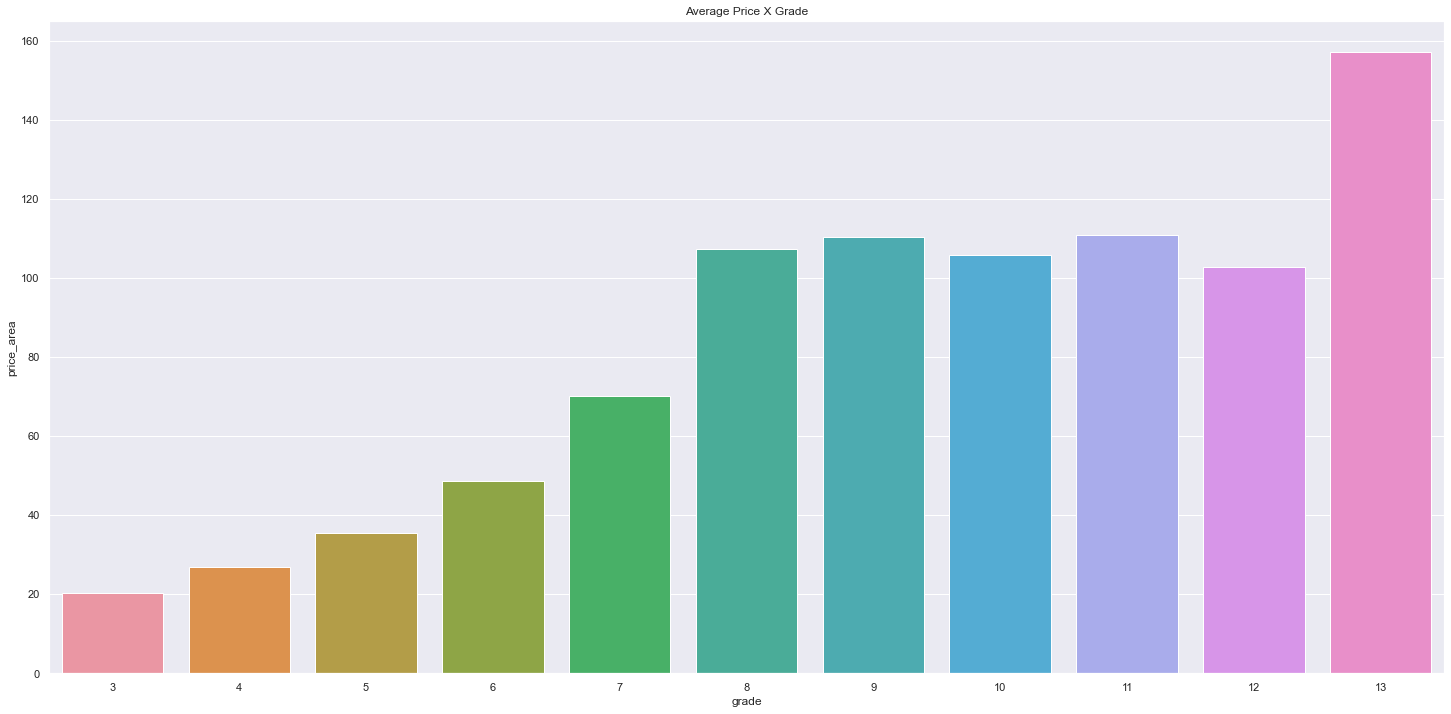

In [60]:
aux51 = cat_attributes[['price_area', 'grade']].groupby('grade').mean().reset_index()
sns.barplot(x='grade', y='price_area', data=aux51).set_title('Average Price X Grade')
plt.savefig(r'../reports/figures/avg_price_grade.png')

There is a big elevation in the price from 7 to 8 and 12 to 13

### Average price for condition

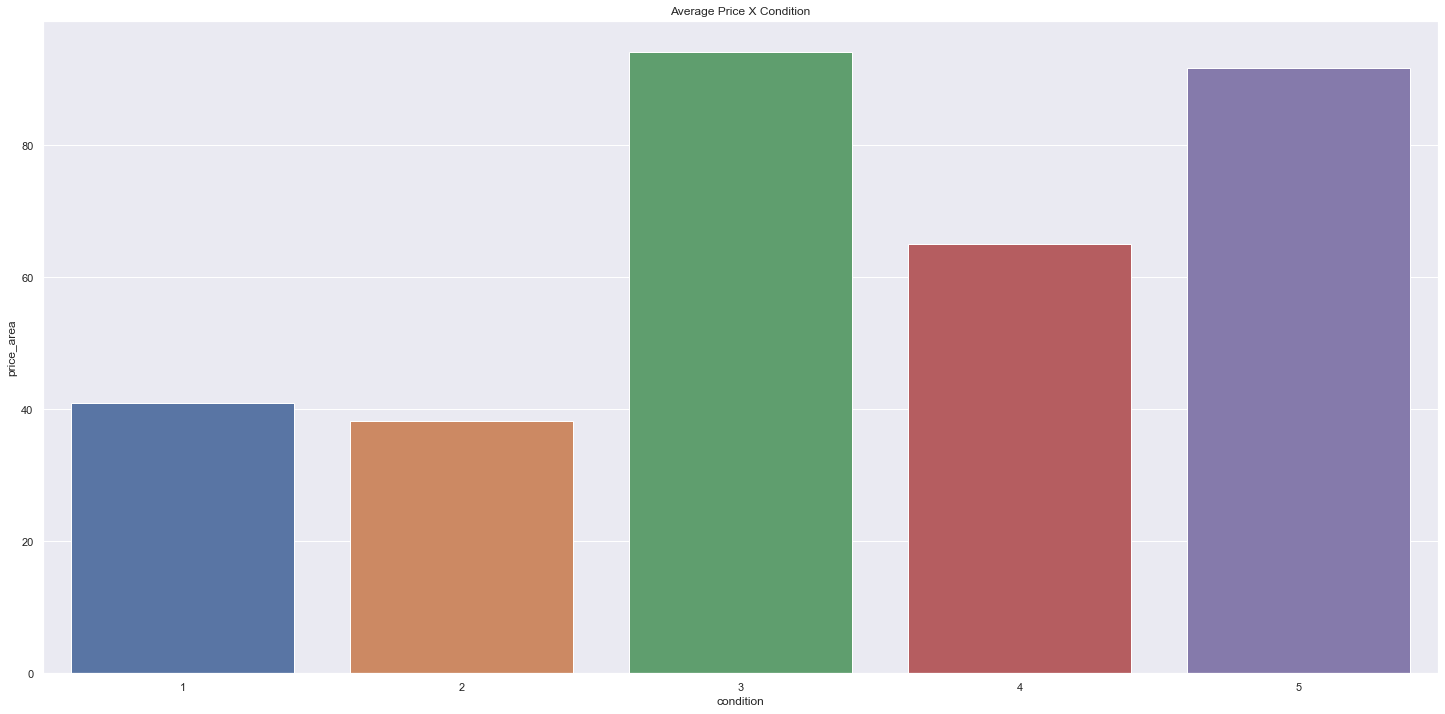

In [61]:
aux52 = cat_attributes[['price_area', 'condition']].groupby('condition').mean().reset_index()
sns.barplot (x='condition', y='price_area', data = aux52).set_title('Average Price X Condition');
plt.savefig(r'../reports/figures/avg_price_condition.png')

It seems that its more valuable buy a 2-condition house and make a lift than buy a 4-conditon one

### Average price per Zipcode

In [62]:
aux53 = cat_attributes[['price_area', 'zipcode']].groupby('zipcode').mean().reset_index()
aux53 = aux53.sort_values(['price_area']).reset_index(drop=True)
aux53.head()

,zipcode,price_area
0,98070,15.20
1,98024,17.07
2,98014,17.77
3,98010,21.09
4,98022,21.99


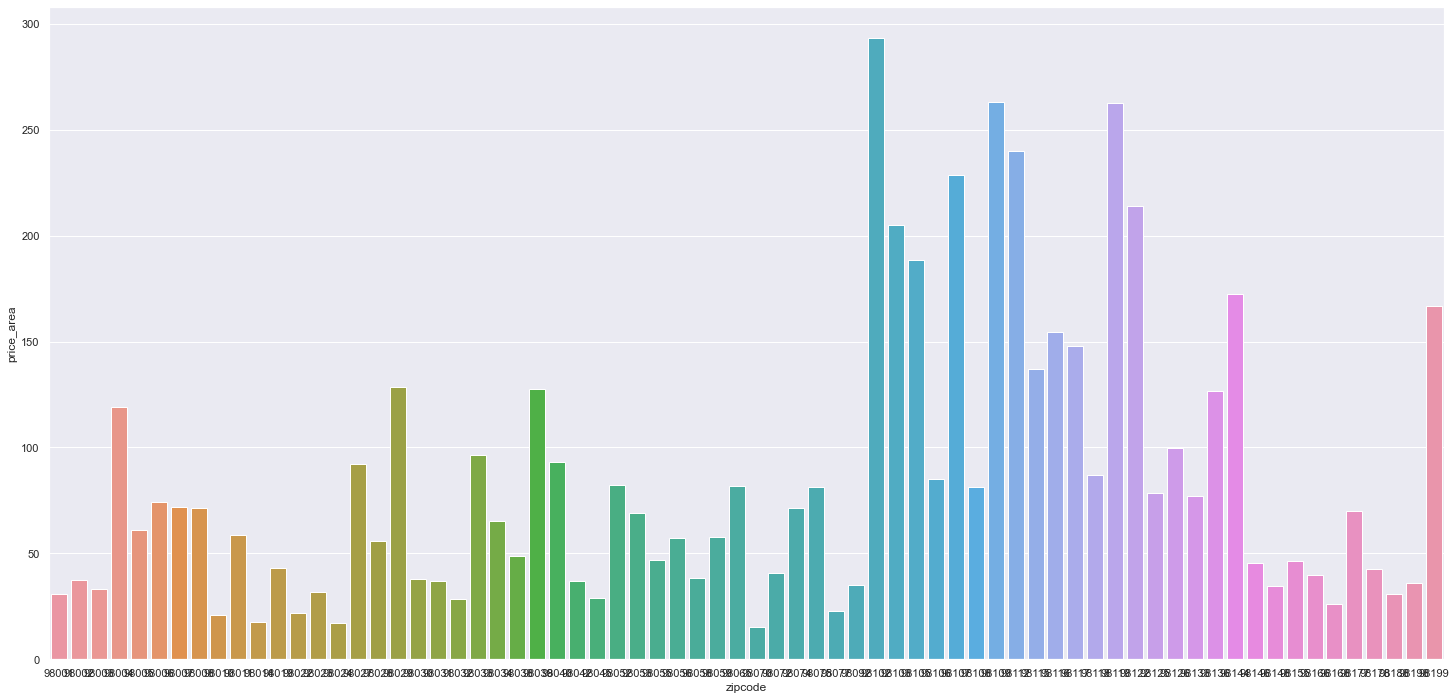

In [63]:
sns.barplot(x='zipcode', y='price_area', data = aux53);

### Average price per year built

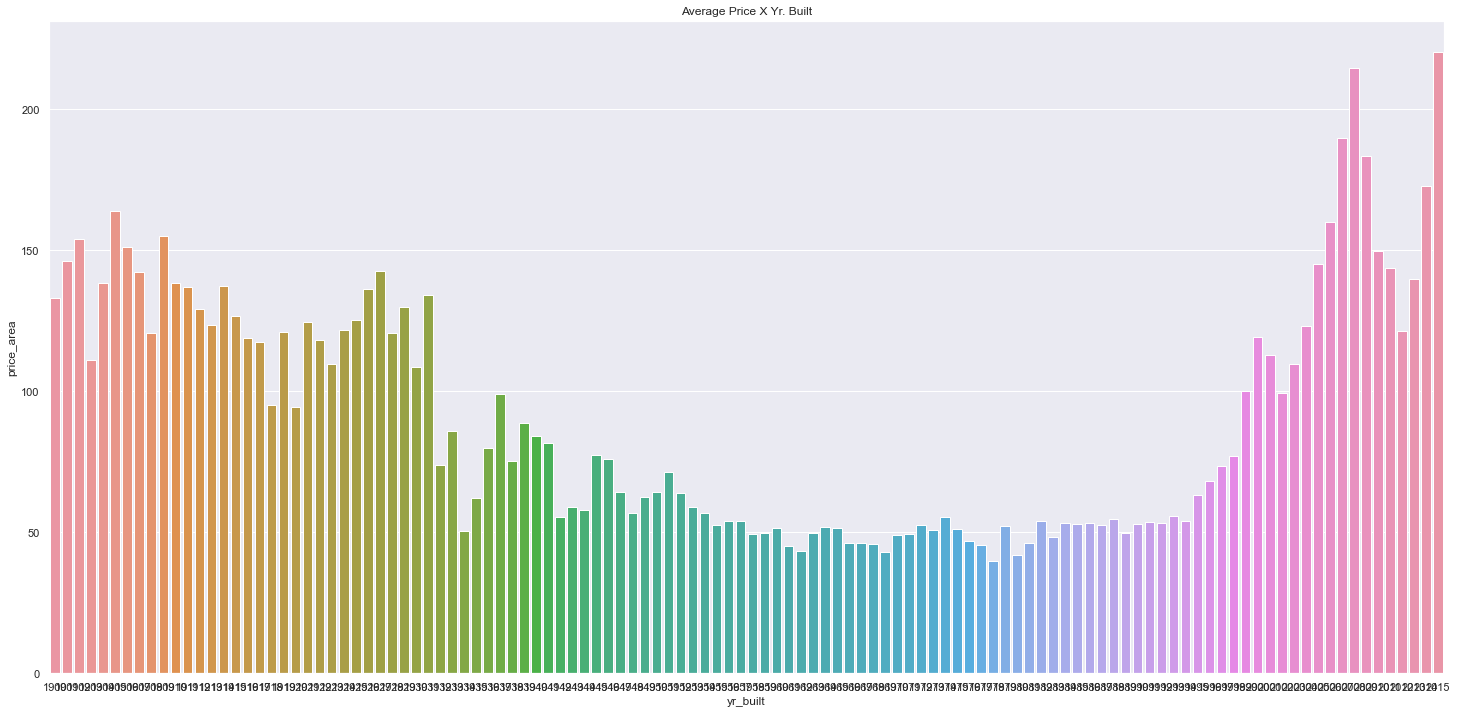

In [64]:
aux54 = cat_attributes[['price_area', 'yr_built']].groupby('yr_built').mean().reset_index()
sns.barplot(x='yr_built', y='price_area', data = aux54).set_title('Average Price X Yr. Built');
plt.savefig(r'../reports/figures/avg_price_yr_built')

### Average price per year renovated

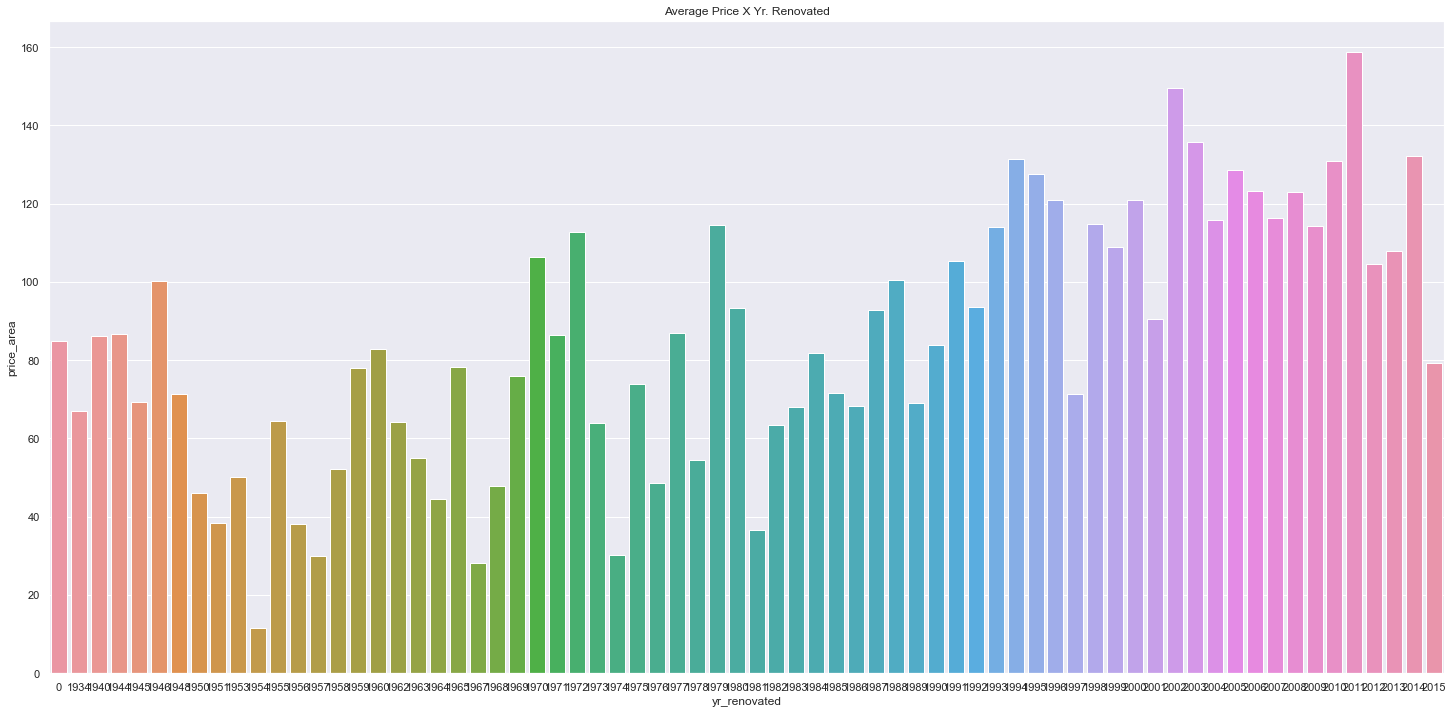

In [65]:
aux55 = cat_attributes[['price_area', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
sns.barplot(x='yr_renovated', y='price_area', data = aux55).set_title('Average Price X Yr. Renovated');
plt.savefig(r'../reports/figures/avg_price_yr_renovated.png')

### Number of transations for time of year

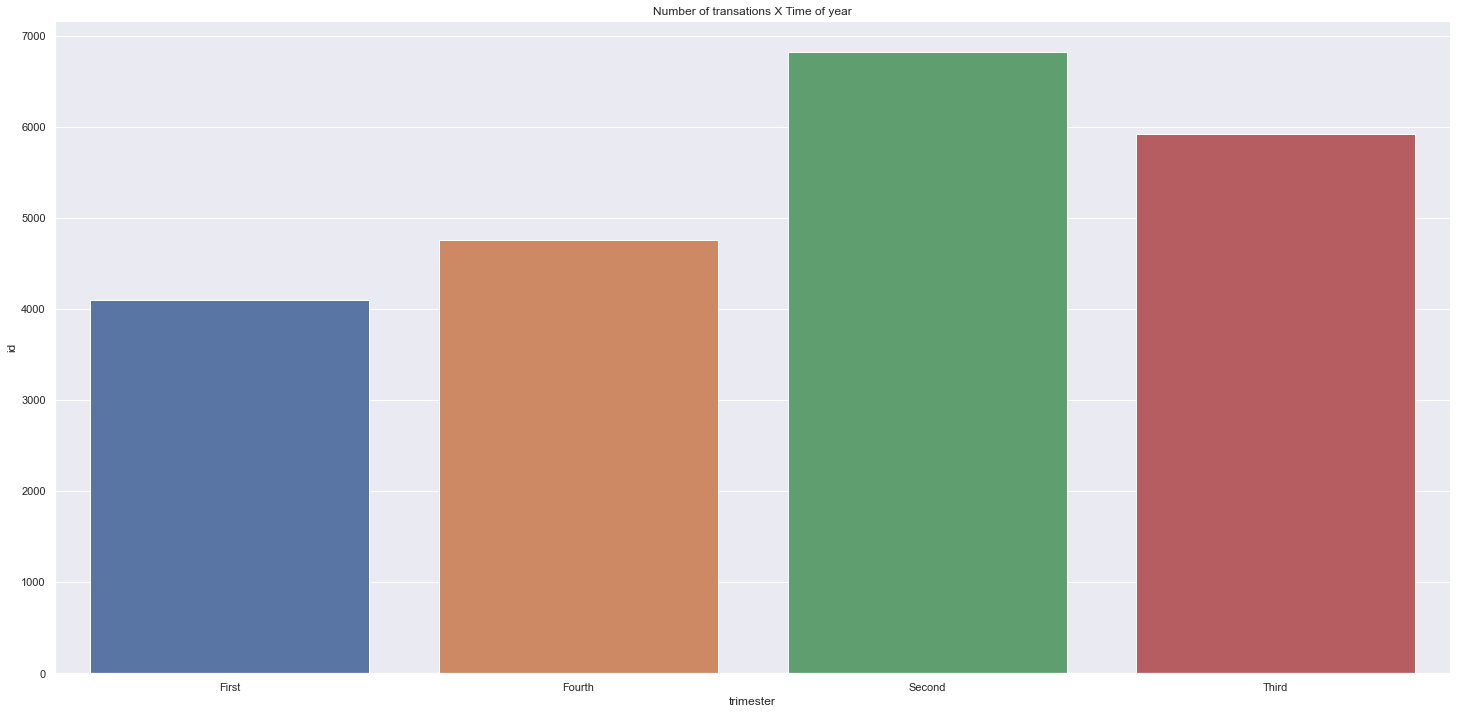

In [66]:
aux56 = cat_attributes[['id','trimester']].groupby('trimester').count().reset_index()
sns.barplot(x='trimester', y='id', data = aux56).set_title('Number of transations X Time of year');
plt.savefig(r'../reports/figures/transations_per__yr.png')

The major part of house transations occurs in the second trimester, as the minor is in the first.

# Hipotesys validation

In [68]:
df6 = df5.copy()

## Houses with waterfront are more expensive - True

In [69]:
df_nowater = df6[df6 ['waterfront'] == 'no' ]
df_water   = df6[df6 ['waterfront'] == 'yes']

print('The average price per squarefoot of the no waterview houses is U$ {:.2f}'.format( df_nowater['price_area'].mean() ) )

print('The average price per squarefoot of the  waterview houses is U$ {:.2f}'.  format( df_water  ['price_area'].mean() ) )


The average price per squarefoot of the no waterview houses is U$ 85.53
The average price per squarefoot of the  waterview houses is U$ 121.08


In [70]:
#Comparing water and zipcodes
zipcode_water = df_water['zipcode'].tolist()
aux6 = df_nowater[df_nowater['zipcode'].isin(zipcode_water)]

print('The average price per squarefoot of the no waterview houses that are in the same zipcode that the ones with it is U$ {:.2f}'.format( aux6['price_area'].mean())  )


The average price per squarefoot of the no waterview houses that are in the same zipcode that the ones with it is U$ 85.78


## Houses that were not renovated are cheaper.

In [73]:
aux6 = df6[df6['yr_renovated'] == 0]
not_renovated_price= aux6['price_area'].mean()

In [74]:
aux6 = df6[df6['yr_renovated'] != 0]
renovated_price=aux6['price_area'].mean()

In [83]:
print('House that were not renovated are {:.2f} % cheaper than the renovated ones'.format(  ((renovated_price/not_renovated_price) - 1 )*100))

House that were not renovated are 23.61 % cheaper than the renovated ones


## There is a time of year that more houses are sold

In [85]:
df6.head()

,id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,area,price_area,zipcode_price,trimester
0,7129300520,2014-10-13,3,1.00,1.00,no,0,3,7,1955,0,98178,47.51,-122.26,5650,39.27,42.61,Fourth
1,6414100192,2014-12-09,3,2.25,2.00,no,0,3,7,1951,1991,98125,47.72,-122.32,7242,74.29,78.56,Fourth
2,5631500400,2015-02-25,2,1.00,1.00,no,0,3,6,1933,0,98028,47.74,-122.23,10000,18.00,55.71,First
3,2487200875,2014-12-09,4,3.00,1.00,no,0,5,7,1965,0,98136,47.52,-122.39,5000,120.80,126.71,Fourth
4,1954400510,2015-02-18,3,2.00,1.00,no,0,3,8,1987,0,98074,47.62,-122.05,8080,63.12,71.44,First


In [86]:
trimester_sales = df6[['id','trimester']].groupby('trimester').count().reset_index()
trimester_sales

,trimester,id
0,First,4100
1,Fourth,4755
2,Second,6820
3,Third,5921


In [87]:
trimester_sales['%'] = (trimester_sales['id'] / total_houses) * 100
trimester_sales

,trimester,id,%
0,First,4100,18.98
1,Fourth,4755,22.02
2,Second,6820,31.58
3,Third,5921,27.42


In [88]:
print('The second trimester is when most houses were sold, and the lower number of houses where negociated in the first trimester')

The second trimester is when most houses were sold, and the lower number of houses where negociated in the first trimester


## There is a main categorical feature that raise the prices.

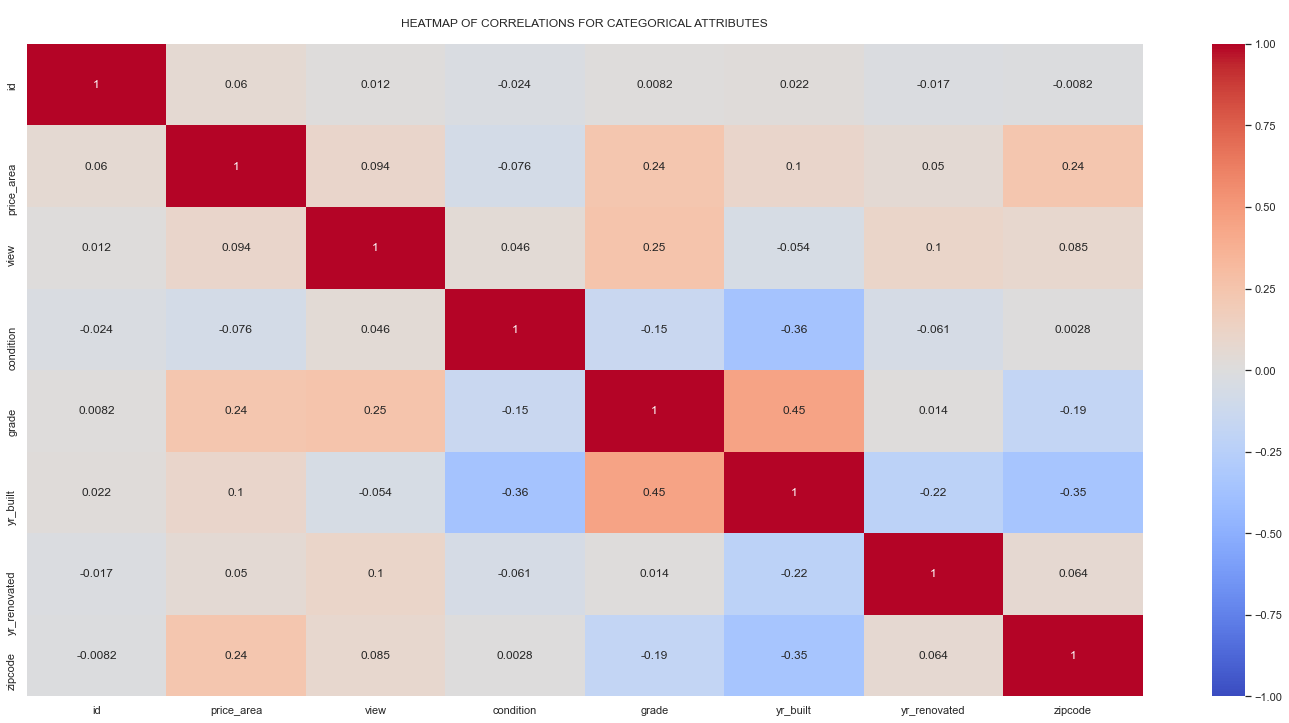

In [89]:
sns.heatmap(cat_attributes.corr(), annot=True, vmin = -1, vmax=1, cmap='coolwarm')
#annot to put the correlations inside the graph
#coolwarm - coll to hot collors
plt.title('\nHEATMAP OF CORRELATIONS FOR CATEGORICAL ATTRIBUTES\n')
plt.savefig(r'../reports/figures/cat_heatmap.png')

## There is a main numerical feature that raise the prices

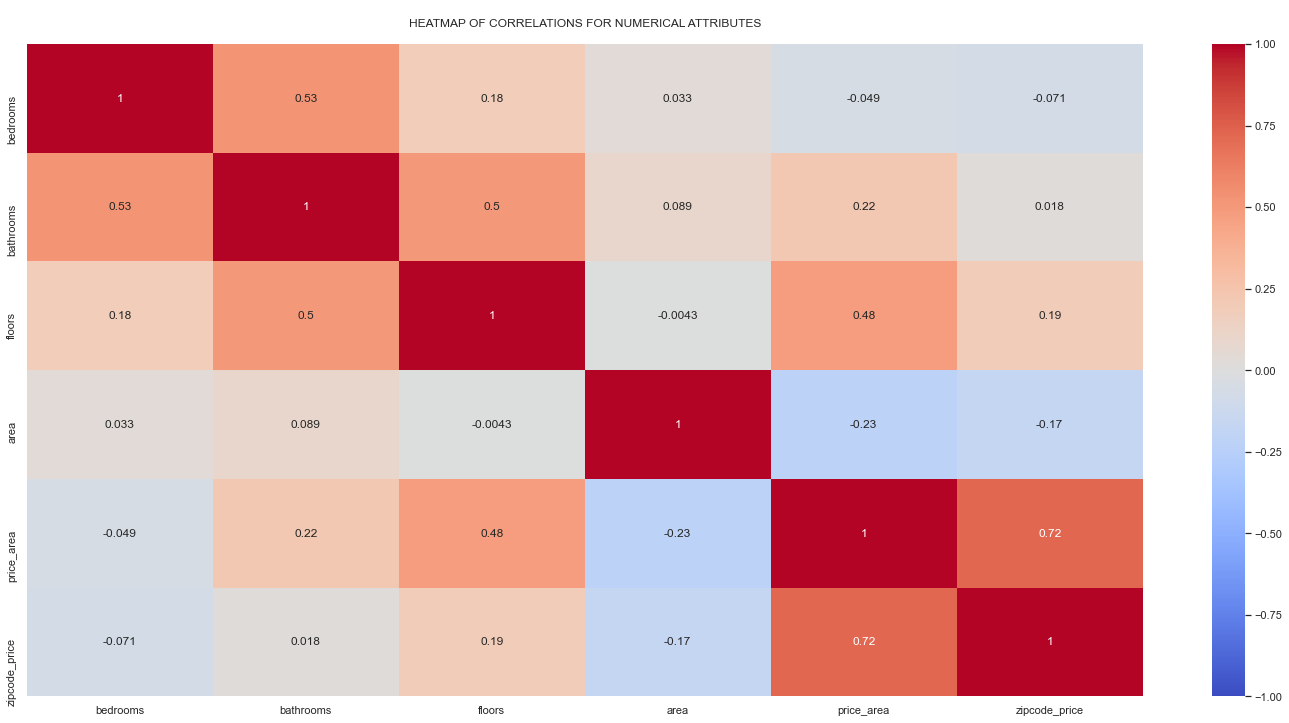

In [90]:
sns.heatmap(num_attributes.corr(), annot=True, vmin = -1, vmax=1, cmap='coolwarm')
plt.title('\nHEATMAP OF CORRELATIONS FOR NUMERICAL ATTRIBUTES\n')
plt.savefig(r'../reports/figures/num_heatmap.png')

In [91]:
print('Among the numerical attributes beyond the obvious relationship between price/area and price/location (zipcode),  the number of floors is the feature that has more correlation with the price')

Among the numerical attributes beyond the obvious relationship between price/area and price/location (zipcode),  the number of floors is the feature that has more correlation with the price


In [92]:
print( 'We can go beyound and discover how much the number of floors affect the prices')

We can go beyound and discover how much the number of floors affect the prices


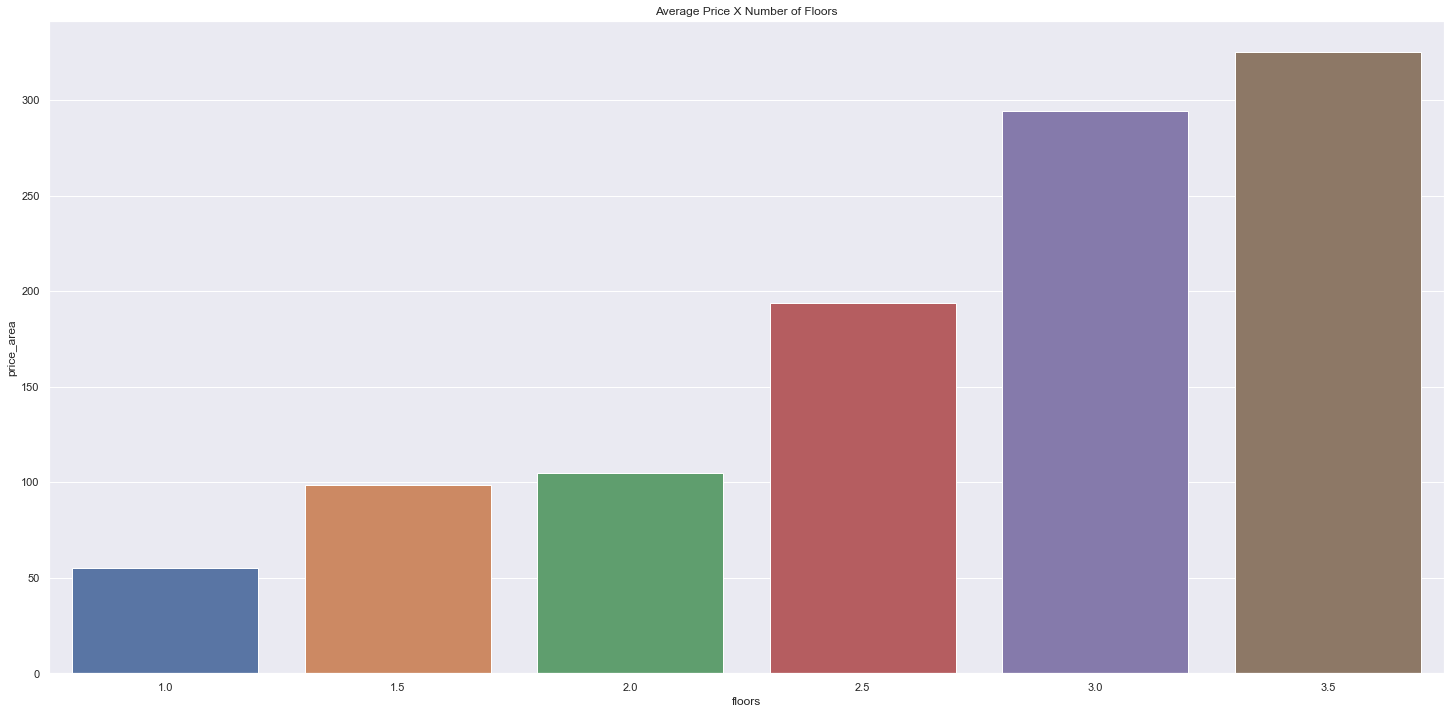

In [93]:
aux66 = num_attributes[['floors', 'price_area']].groupby('floors').mean().reset_index()
sns.barplot(data=aux66, x='floors', y='price_area').set_title('Average Price X Number of Floors')
plt.savefig(r'../reports/figures/avg_price_floors.png')

In [94]:
aux66.columns = ['floors', 'avg_price/area']

In [95]:
aux66['increase_floor'] = ((aux66['avg_price/area'] * 100) / 55.18)
aux66

,floors,avg_price/area,increase_floor
0,1.00,55.18,100.01
1,1.50,98.42,178.36
2,2.00,104.76,189.85
3,2.50,193.55,350.77
4,3.00,294.36,533.46
5,3.50,325.09,589.15


For each floor addictioned, there is a average rise about 118% in the price.

# Business Insights

In [112]:
df7 = df6.copy()

## Houses with price below the average price for the zip code would be a good deal

In [133]:
aux7 = df7[['id','price_area','area','zipcode_price', 'condition']]
cheap_price = aux7[aux7['price_area'] <= aux7['zipcode_price']]
cheap_price.head()

,id,price_area,area,zipcode_price,condition
0,7129300520,39.27,5650,42.61,3
1,6414100192,74.29,7242,78.56,3
2,5631500400,18.00,10000,55.71,3
3,2487200875,120.80,5000,126.71,5
4,1954400510,63.12,8080,71.44,3


In [134]:
cheap_price['profit'] = (cheap_price['zipcode_price'] - cheap_price['price_area']) * cheap_price['area']
total_profit = cheap_price['profit'].sum()

<ipython-input-134-0c93bd700231>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cheap_price['profit'] = (cheap_price['zipcode_price'] - cheap_price['price_area']) * cheap_price['area']


In [135]:
print('There is {} houses who price is below the average price for its region. This houses should be bought. The profi earned is about U$ {:.2f}'.format(cheap_price.shape[0], total_profit))

There is 13097 houses who price is below the average price for its region. This houses should be bought. The profi earned is about U$ 8997560380.03


## Houses with price below the average price for the zip code AND condition equal '2' and '4' would be a good opportunity to high the grade and profit

In [136]:
cheap_price_2 = cheap_price[cheap_price['condition'] == 2]
cheap_price_2.head()

,id,price_area,area,zipcode_price,condition,profit
38,7895500070,29.72,8075,30.87,2,9288.38
242,1868901275,91.00,5000,137.12,2,230604.84
328,1665400045,24.41,7636,39.82,2,117725.23
465,8658300340,15.84,5050,17.77,2,9763.25
702,6205500030,45.39,10575,60.92,2,164213.76


In [137]:
cheap_price_4 = cheap_price[cheap_price['condition'] == 4]
cheap_price_4.head()

,id,price_area,area,zipcode_price,condition,profit
11,9212900260,78.00,6000,137.12,4,354725.80
12,114101516,15.58,19901,55.71,4,798716.16
13,6054650070,41.32,9680,71.44,4,291553.14
17,6865200140,112.79,4300,204.90,4,396050.02
18,16000397,19.19,9850,37.27,4,178096.15


In [138]:
print('There are {} houses whos price is below the average price for its region and the condition is equal 2 or 4.\n This houses should be bought and evaluate the retrofit to sell with a major profit.'.format(cheap_price_2.shape[0]+cheap_price_4.shape[0]))

There are 4443 houses whos price is below the average price for its region and the condition is equal 2 or 4.
 This houses should be bought and evaluate the retrofit to sell with a major profit.


# Conclusion

Produtos finais
Lista de imóveis para compra
Lista de imóveis para compra e reforma
Mapa com todos os imóveis e diferenciando pelo preço
App

# Next steps

- Defining a % for 2-condition houses, it can be bought more houses
- Expand the study for retrofit to 4-condition houses
- Use ML models to find clusters among the houses and classify them
- Can use the data to a simple regression model to the price of selling future houses